In [24]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.constants import R

In [25]:
def read_energies(filename):
    data = []
    with open(filename,'r') as f:
        lines = f.readlines()
        data_lines = lines[24:]
        for line in data_lines:
            data_i = line.split(' ')
            data.append([float(data_i[4]), float(data_i[-1][:-2])])

    return np.array(data)

def combine_energy(filenames):
    data = []
    for filename in filenames:
        data.append(read_energies(filename))

    return np.concatenate(data)

def get_traj(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
        data = []
        for line in lines[34:]:
            data_i = line.split(' ')
            data.append([float(data_i[0]), float(data_i[2])])

    return np.array(data)

In [26]:
# Initialize an empty list to store trajectory data from multiple files
ramas = []

# Loop through a range of numbers to construct filenames dynamically
for i in range(1, 9):
    # Append the trajectory data from each file to the list
    ramas.append(get_traj(f'replica_{i}.xvg'))

# Print the shape of the array from the first file to check data structure
print(ramas[0].shape)

(606, 2)


In [27]:
def get_landscape_from_trajs(rama, temp, bins=60):
    
    # Calculate the 2D histogram for the Ramachandran plot data
    counts, x_edges, y_edges = np.histogram2d(rama[:, 0], rama[:, 1], bins=bins)
    
    # Calculate the free energy landscape from count data
    energy = -np.log(counts) * R * temp * 0.001

    # Normalize energy by subtracting the minimum energy value to set it to zero
    energy -= np.nanmin(energy)
    
    # Compute the center of each bin in x and y directions
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    
    # Return the x and y bin centers and the transposed energy matrix
    return x_centers, y_centers, energy.T

C:\Users\jhyan\AppData\Local\Temp\ipykernel_16596\632593617.py:7: RuntimeWarning: divide by zero encountered in log
  energy = -np.log(counts) * R * temp * 0.001


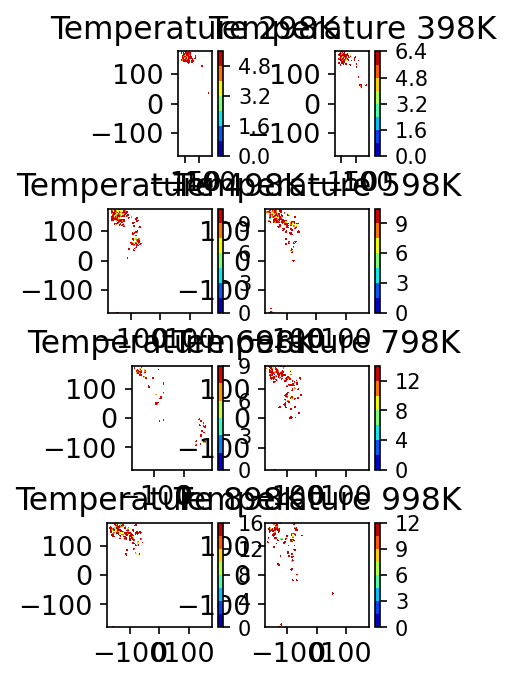

In [28]:
fig, axs = plt.subplots(4,2, dpi=150)
plt.subplots_adjust(left=0.6, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.5)
temperatures = range(298,999,100)

for i in range(4):
    for j in range(2):

        idx = int(2*i+j)
        x_center, y_center, energy = get_landscape_from_trajs(ramas[idx], temperatures[idx], bins=100)
        contour = axs[i,j].contourf(x_center, y_center, energy, cmap='jet')

        axs[i,j].set_title(f'Temperature {temperatures[idx]}K', fontsize=15)
        axs[i,j].set_aspect('equal')
        axs[i,j].tick_params(axis='both', labelsize=13)
        
        cbar = plt.colorbar(contour, ax=axs[i, j], shrink=1.0, spacing='proportional')
        cbar.ax.tick_params(labelsize=10)
        cbar.ax.locator_params(nbins=5)